# Ploting and Visulisation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Everything in matplotlib is organized in a hierarchy. 
 * At the top of the hierarchy is the matplotlib "state-machine envvironment" which is provided by the matplotlib.pyplot module.
 * The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used **only for a few functions such as figure creation**, and the user explicitly creates and keeps track of the figure and axes objects. 
  * At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.
 * For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

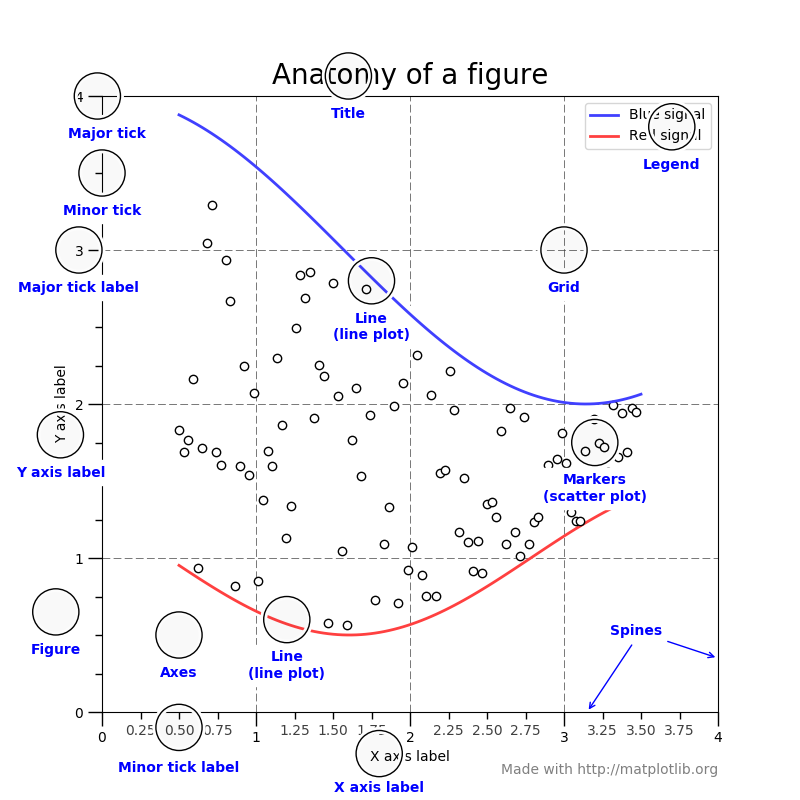

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given __figure__ can contain many __Axes__, but a given __Axes__ object can only be in one __Figure__. The __Axes__ contains two (or three in the case of 3D) __Axis__ objects which take care of the data limits (the data limits can also be controlled via set via the *set_xlim()* and *set_ylim()* __Axes__ methods). Each __Axes__ has a title (set via *set_title()*), an x-label (set via *set_xlabel()*), and a y-label (set via *set_ylabel()*). 

### Axis
These are the number-line-like objects.(???) They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a *Locator* object and the ticklabel strings are formatted by a *Formatter*. The conbination of the correct *Locator* and *Formatter* gives very fine control over the tick locations and labels.

### Artist
Everything you can see on the figure is an artist (even the *Figure*, *Axes*, and *Axis* objects). Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

Hierarchy:
* Figure
  * Axes: set_title(), set_xlabel(), set_ylabel()
   * Axis: control the data limits
     * Locator object: controls the ticks location
     * Formatter: format the ticklabel strings

## Types of inputs to plotting functions

All of plotting functions expect *np.array* or *np.ma.masked_array* as input. Classes that are 'array-like' such as pandas data objects and *np.matrix* may or may not work as intended. It is best to convert these to *np.array* objects prior to plotting.

In [2]:
# to convert a pandas.DataFrame
import pandas as pd
import numpy as np
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asndarray = a.values
type(a_asndarray)

numpy.ndarray

In [3]:
# to convert a np.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
type(b_asarray)

numpy.ndarray

### Figure
The figure keeps track of all the child **Axes**, a smattering of 'special' artists (titles, figure legends, etc).

The easiest way to create a new figure is with pyplot:

<IPython.core.display.Javascript object>


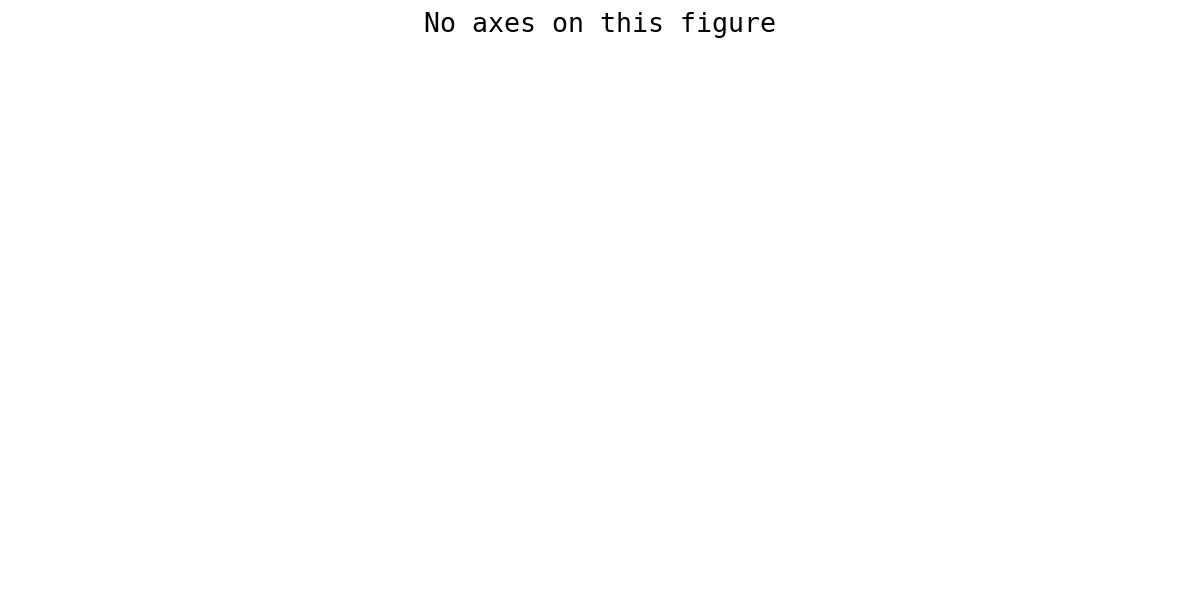

<IPython.core.display.Javascript object>


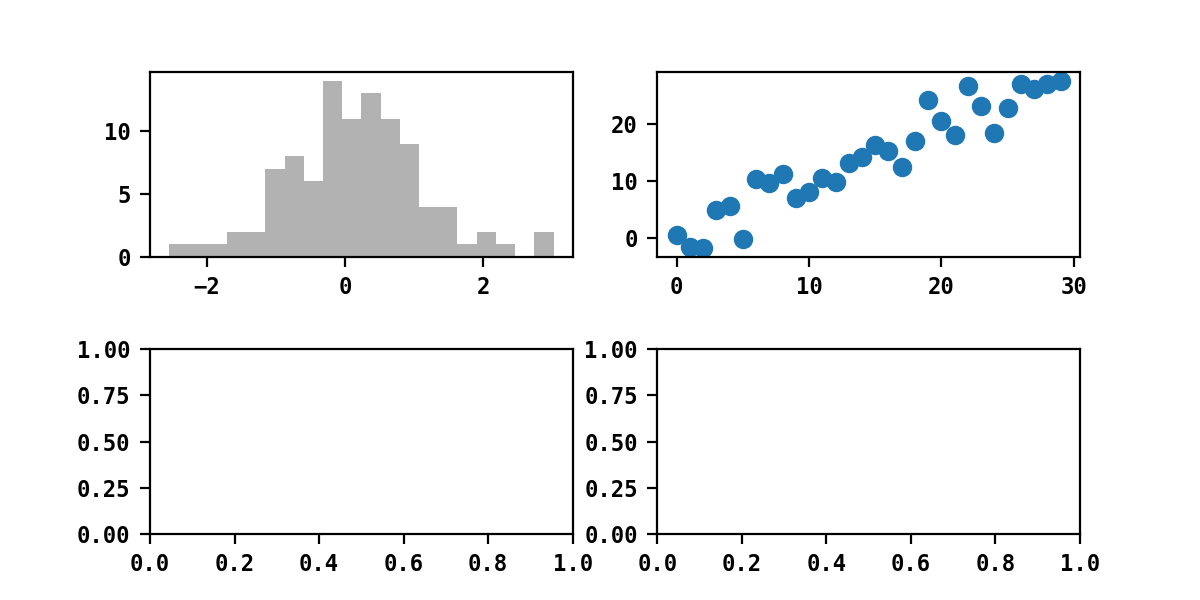

In [96]:
plt.rc('figure', figsize=(6, 3))
fig = plt.figure()    # an empty figure with no axes
fig.suptitle('No axes on this figure')    # add a title so we know which it is
fig, ax_list = plt.subplots(2, 2)    # a figure with a 2x2 grid of Axes. (this fig is a new one, different from fig from the first command)
# plt.subplots(2, 3, sharex=True, sharey=True) 可以共享x y 轴。
_ = ax_list[0, 0].hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # careful with the ax_list slice!!!
ax_list[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# subplots_adjsut 命令，下边介绍。此命令需要跟fig的创建命令同框才有效。
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # None和0是不一样的

## Adjusting the spacing around subplots
You can change the spacing using the *subplots_adjust* method on *Figure* objects, also available as a top-level function:

<IPython.core.display.Javascript object>


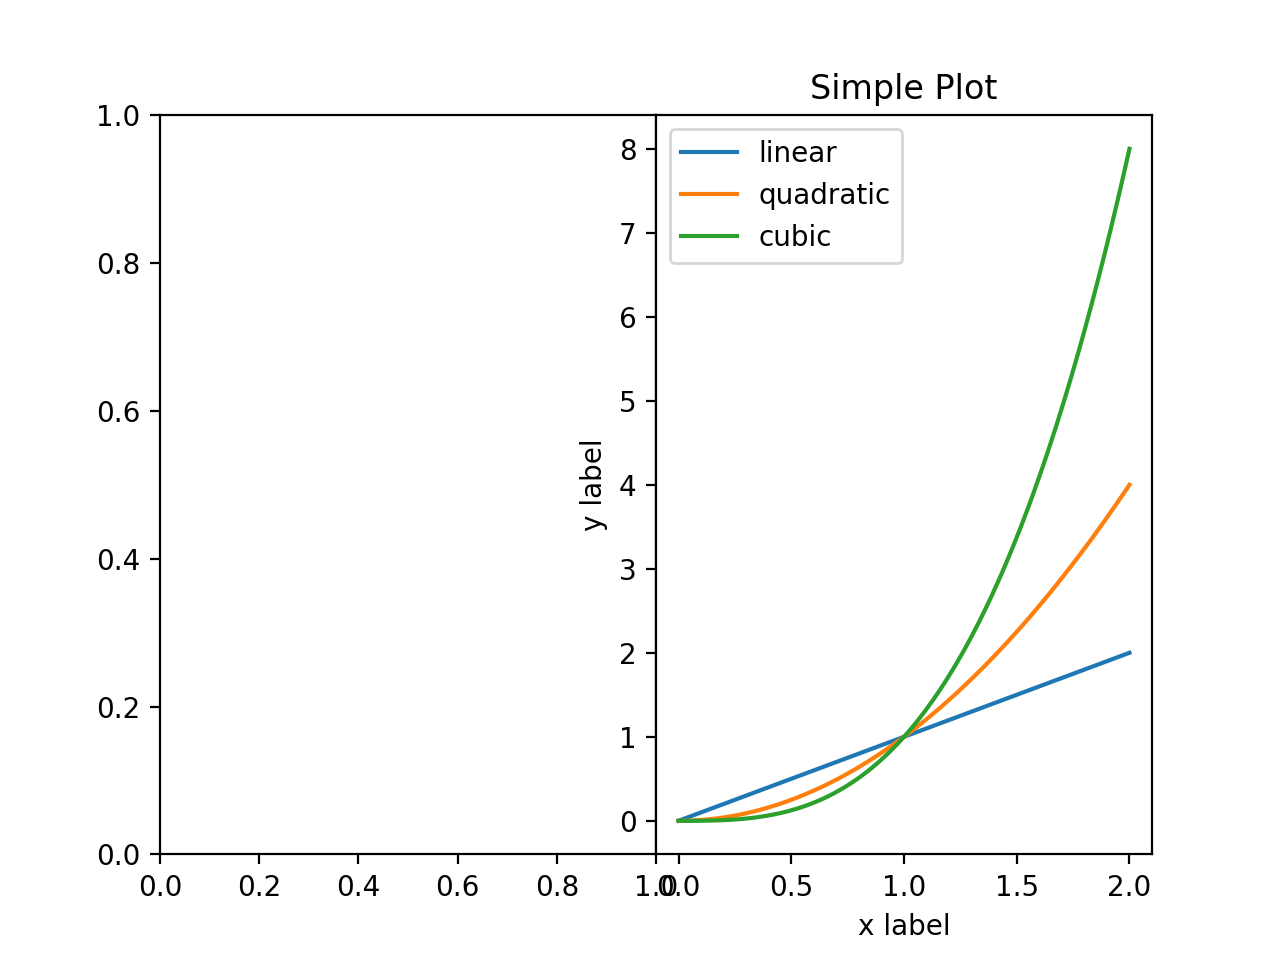

In [5]:
plt.subplots_adjust(left=2, bottom=3, right=3, top=4, wspace=1, hspace=1)
fig, axe = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0, hspace=0)

### Matplotlib, pyplot, and pylab;
 * matplotlib is the whole package
 * pyplot is a module in matplotlib
 * pylab is a module that gets installed alonside matplotlib （deprecated and strongly dicourage to use it)
 
pyplot provides the 'state-machine interface'.

In [6]:
# all these plots are added to the last fig exist.
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
         
plt.xlabel('x label')
plt.ylabel('y label')
         
plt.title('Simple Plot')

plt.legend()
         
plt.show()

The first call to *plt.plot* will automatically create the necessary figure and axes to archieve the desired plot. Subsequent call to *plt.plot* re-use the current axes and each add another line. 

pylab is deprecated and its use is strongly discouraged.

For non-interactive ploting it is suggested to use pyplot to create the figures and then the OO interface for ploting.

### coding style

Typically one finds oneself making the same plots with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

<IPython.core.display.Javascript object>


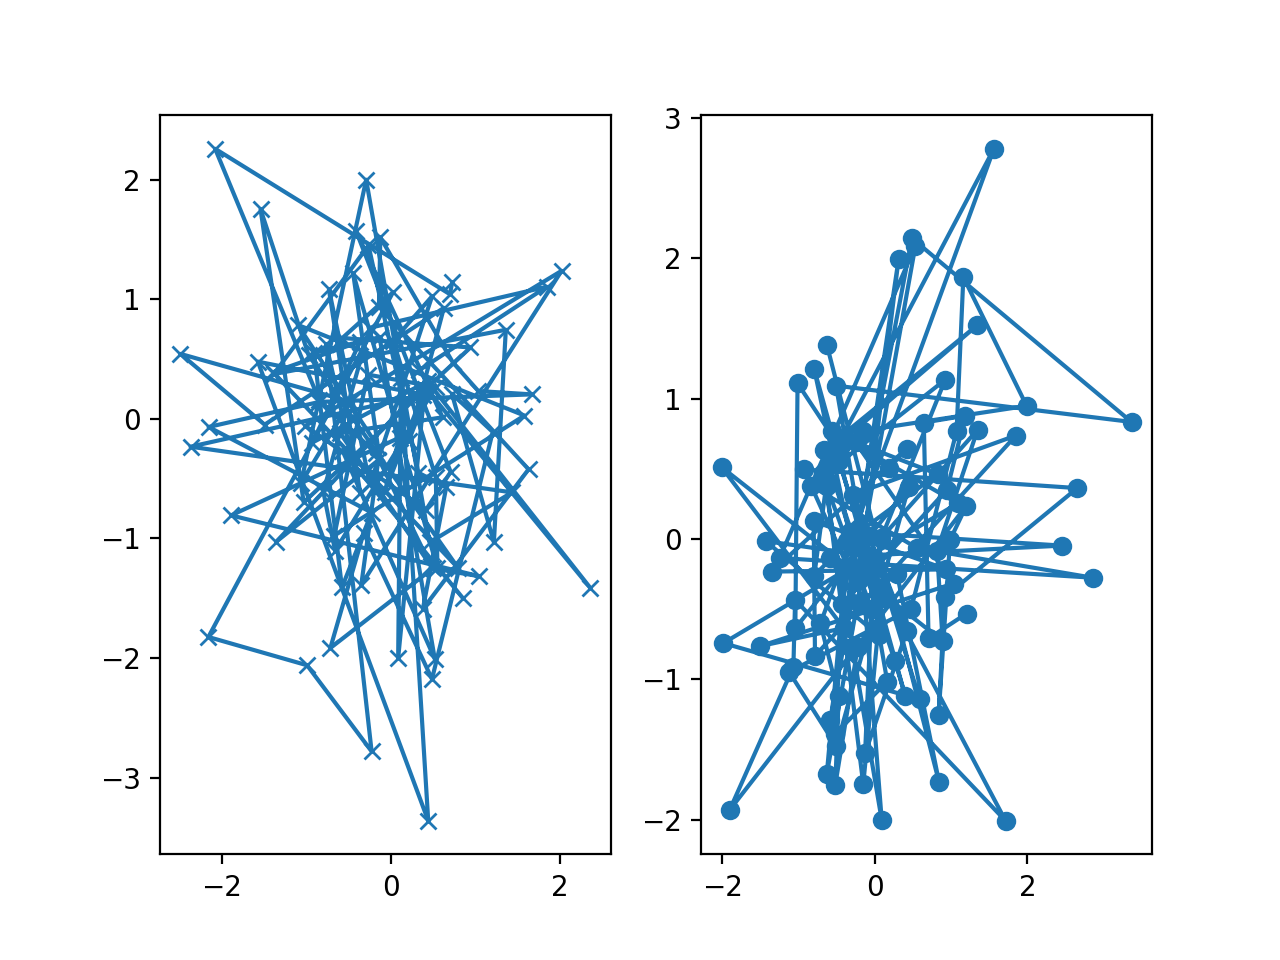

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    
    Parameters
    ----------
    ax : Axes
        The axes to draw to
        
    data1 : array
        The x data
        
    data2 : array
        The y data
        
    param_dict : dict
        Dictionary of kwargs to pass to ax.plot
        
    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 2)
my_plotter(ax[0], data1, data2, {'marker': 'x'})
my_plotter(ax[1], data3, data4, {'marker': 'o'})

### Colors, Markers, and Line Styles
*plot* functin optionally accepts a string abbreviation indicating color and line style. 

<IPython.core.display.Javascript object>


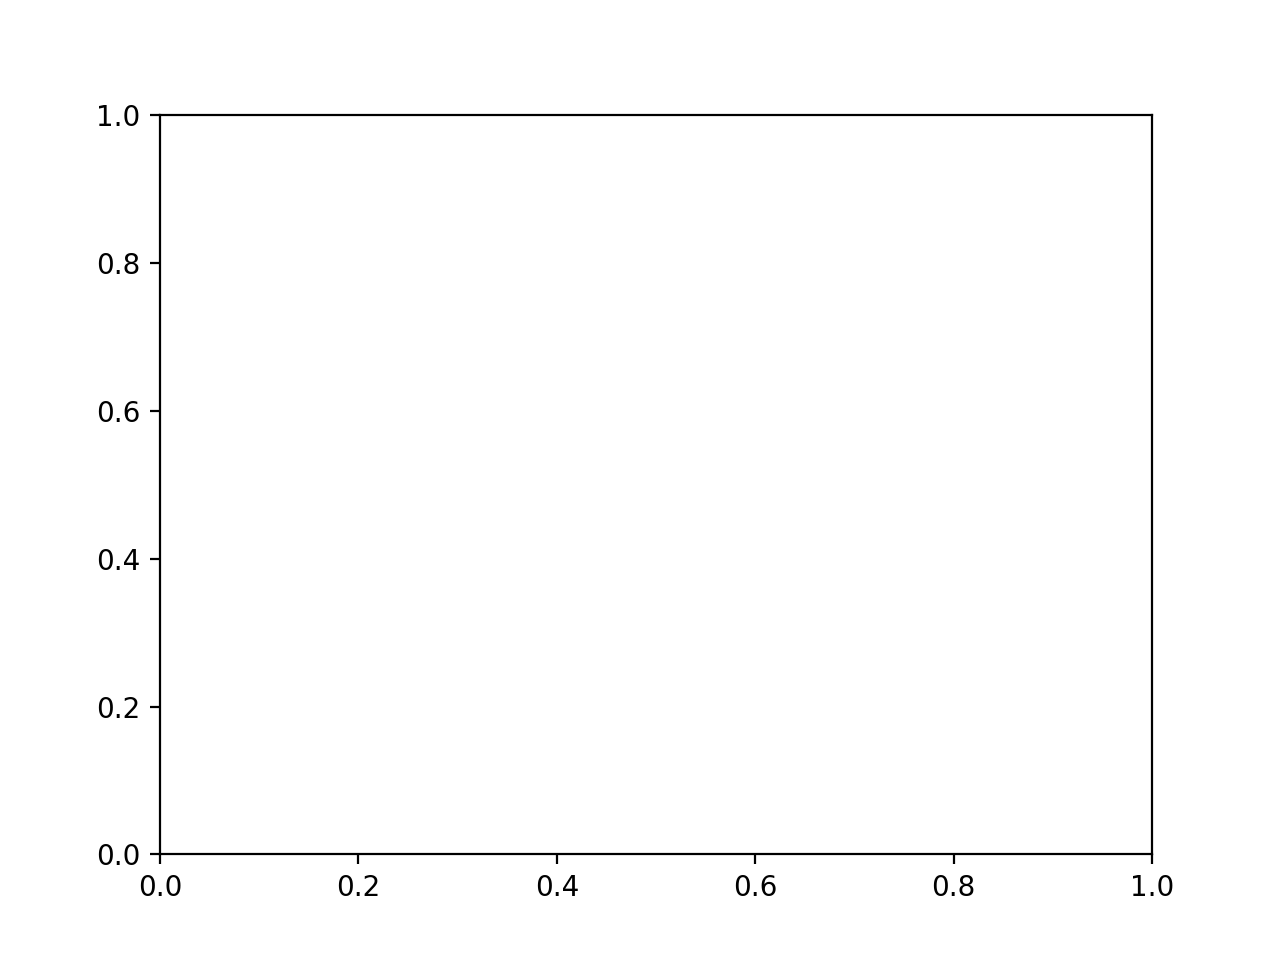

In [17]:
ydata = np.random.randn(100)
xdata = np.linspace(0, 99, 100)
fig, axes = plt.subplots()
axes.plot(xdata, ydata, 'ko--')

In practice if you were creating plots programmatically you might prefer not to have to munge strings together, but rather express it more explicitly as:

<IPython.core.display.Javascript object>


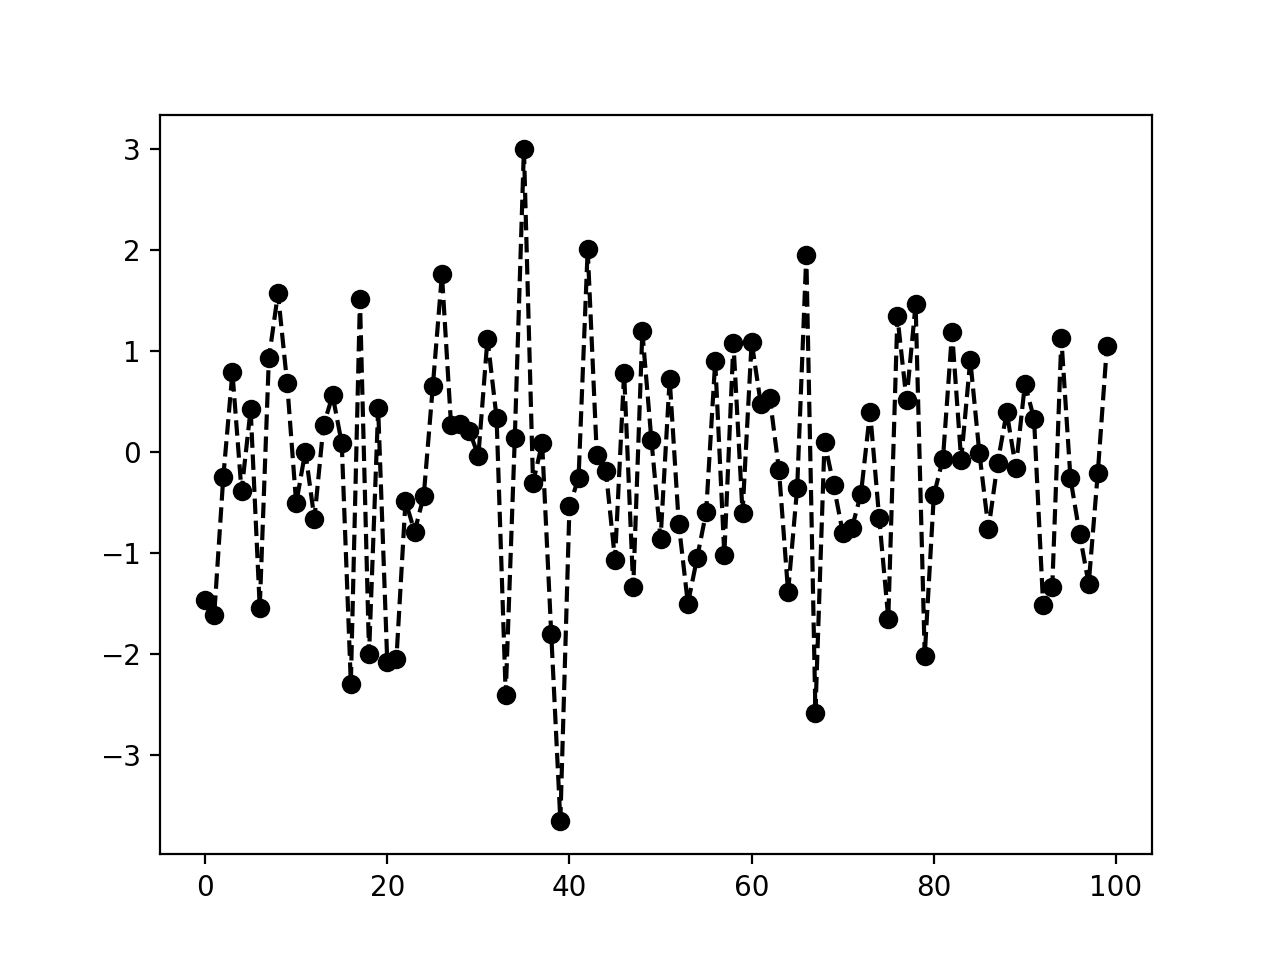

In [15]:
ydata = np.random.randn(100)
xdata = np.linspace(0, 99, 100)
fig, axes = plt.subplots()
axes.plot(xdata, ydata, color='k', linestyle='dashed', marker='o')

### change the drawstyle option

<IPython.core.display.Javascript object>


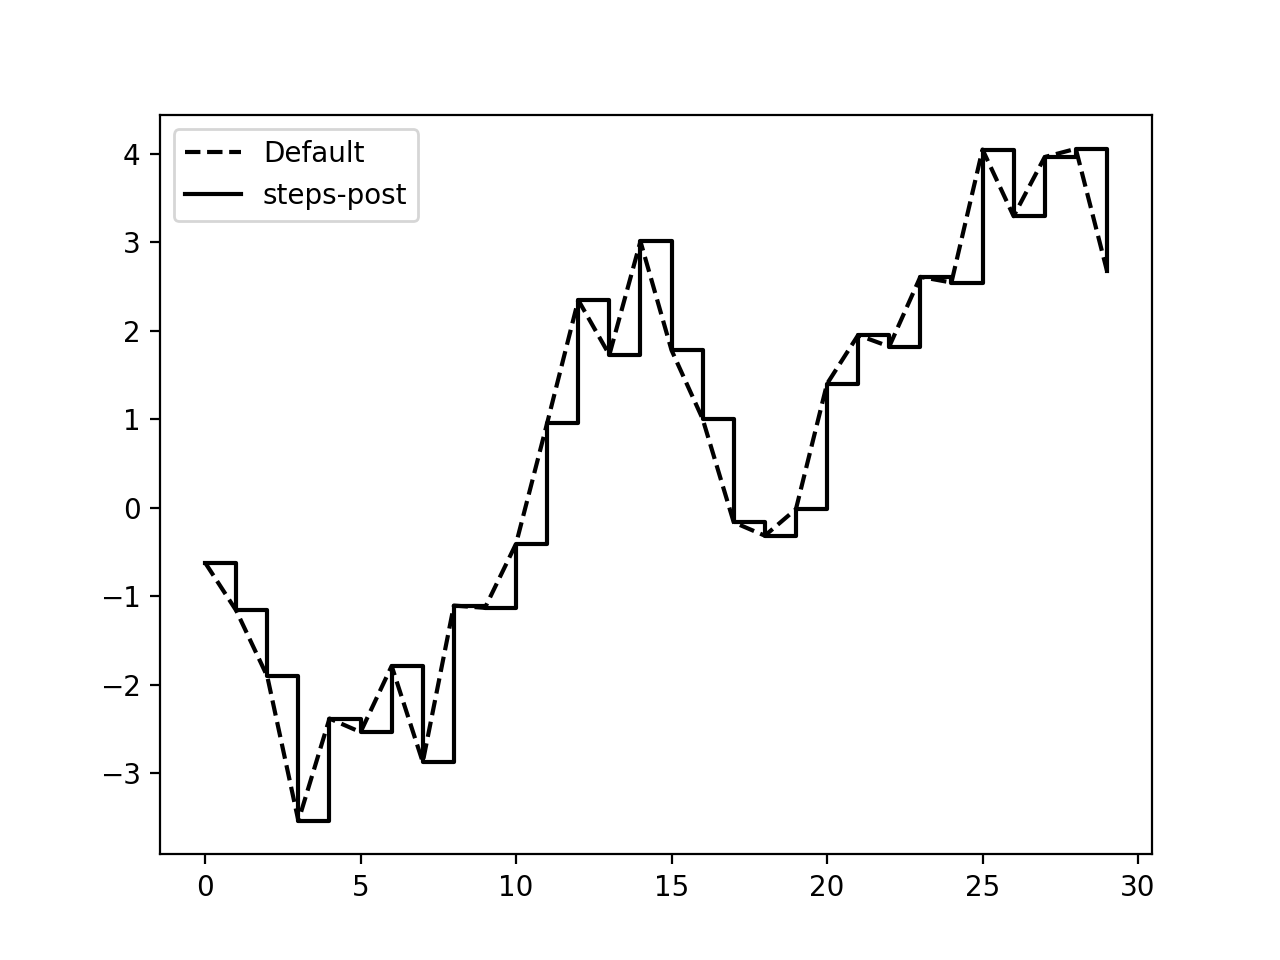

In [20]:
data = np.random.randn(30).cumsum()
fig, axes = plt.subplots()
axes.plot(data, 'k--', label='Default')
axes.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
axes.legend(loc='best')

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things:
 * pyplot interface (i.e., matplotlib.pyplot), consists methods like below
  * xlim : the plot range
    * ax.get_xlim
    * ax.set_xlim
  * xticks : tick locations
    * ax.get_xticks
    * ax.set_xticks : instructs matplotlib where to place the ticks
  * xticklabels : tick labels
    * ax.get_xticklabels
    * ax.set_xticklabels : 
  
    These can be used in two ways:  
      * called with no arguments returns the current parameter value (e.g., plt.xlim())
      * called with parameters sets the parameter value (e.g., plt.xlim([0, 10]))
      
    All such methods act on the active or most recently created **AxesSubplot**. Each of them corresponds to two methods on the subplot object itself, shown above.
 
 
 * the more object-oriented native matplotlib API

<IPython.core.display.Javascript object>


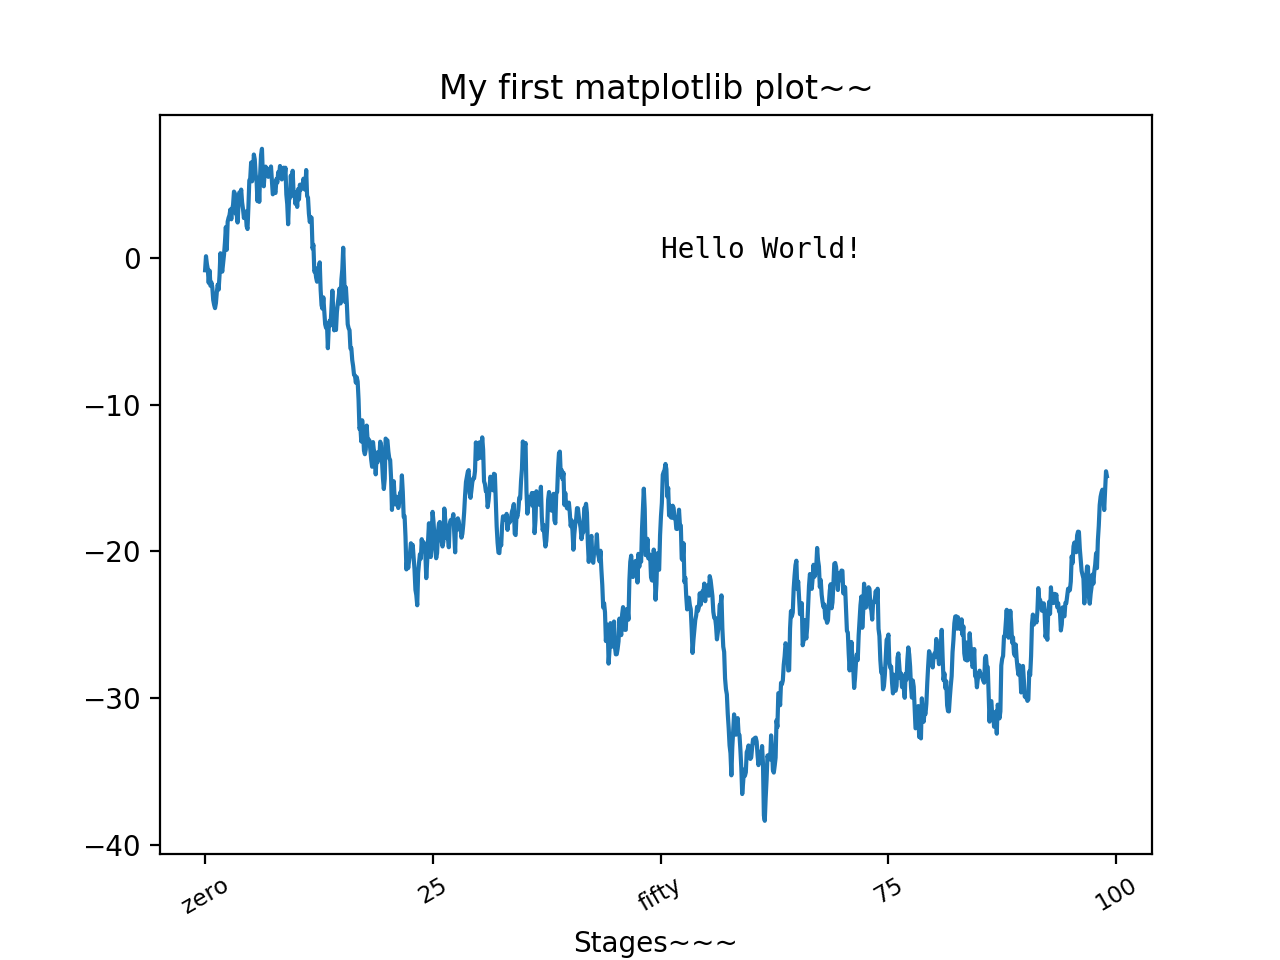

Text(0.5, 0, 'Stages')

In [32]:
ydata = np.random.randn(1000).cumsum()
xdata = np.linspace(0, 99, 1000)
fig, axes = plt.subplots()
axes.plot(xdata, ydata)
xticks = axes.set_xticks([0, 25, 50, 75, 100])
xlabels = axes.set_xticklabels(['zero', '25', 'fifty', 75, '100'], rotation=30, fontsize='small')
axes.set_title('My first matplotlib plot')
axes.set_xlabel('Stages')

#### batch setting of plot properties using ax.set()

In [34]:
props = {
    'title': 'My first matplotlib plot~~',
    'xlabel': 'Stages~~~'
}
axes.set(**props)

[Text(0.5, 30.063360157402354, 'Stages~~~'),
 Text(0.5, 1.0, 'My first matplotlib plot~~')]

#### Adding legends

Easiest way to add legends is to pass the **label** argument when adding each piece of the plot. Then either call
 * **axes.legend()**
 * **plt.legend()** 
 
to automatically create a legend (with optional argument loc='best'). To exclude one or more elements from the legend, pass no label or label='_nolegend_'.

#### Annotations and Drawing on a Subplot
Adding annotations and text using functions:
 * text
 * arrow
 * annotate: text and arrow can also be added along with annotate function

In [35]:
x, y = 50, 0
axes.text(x, y, 'Hello World!', family='monospace', fontsize=10)

Text(50, 0, 'Hello World!')

<IPython.core.display.Javascript object>


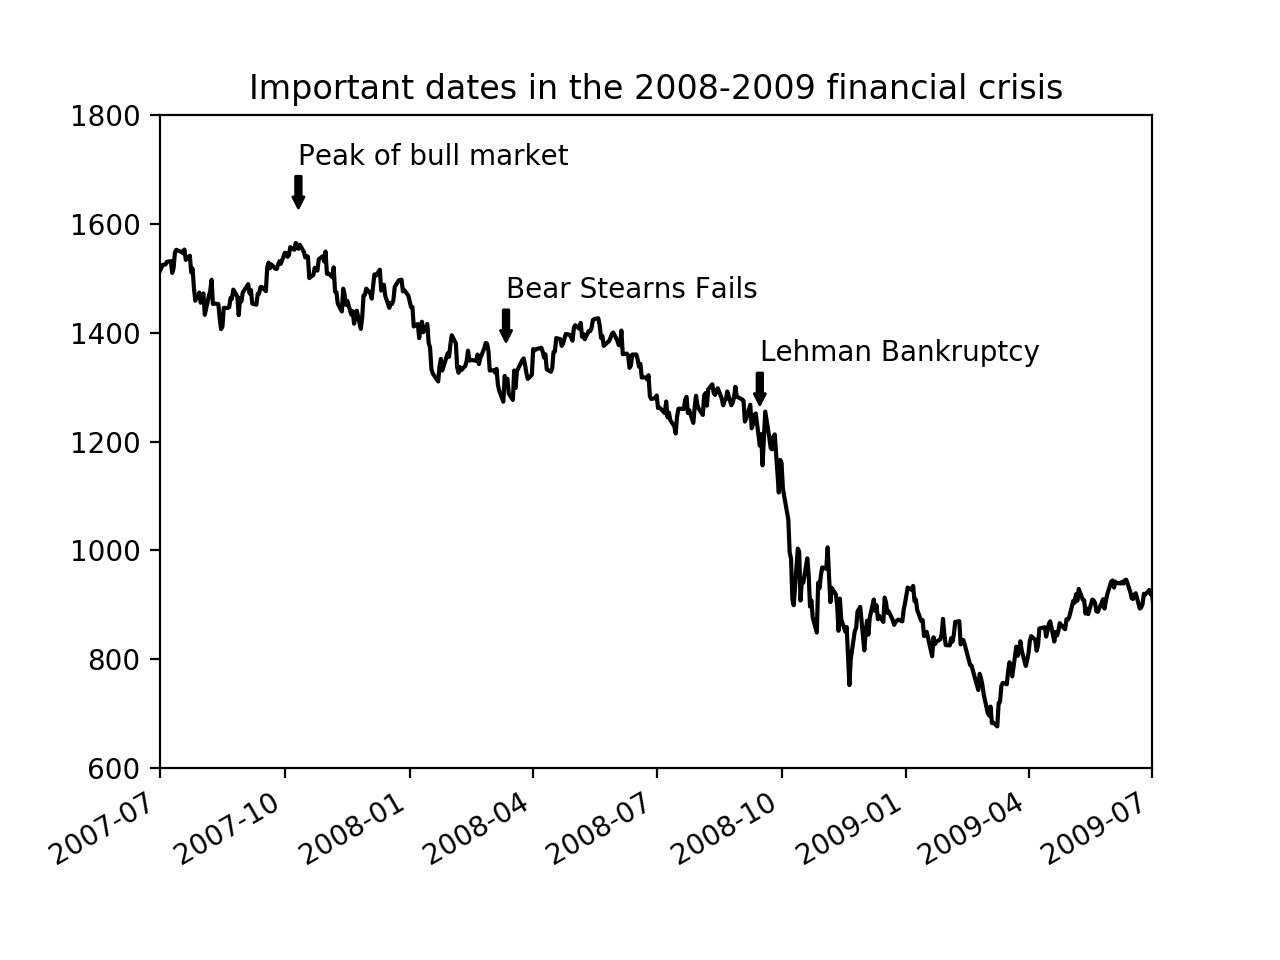

[(600, 1800),
 (732858.0, 733589.0),
 Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')]

In [67]:
from datetime import datetime
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=axes, style='k-')

crisis_data =  [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
# label:显示的文字；xy: 箭头尖所在位置；xytext：文字起始位置(也是箭头尾的位置); 
for date, label in crisis_data:
    axes.annotate(label, xy=(date, spx.asof(date) + 75),
                 xytext=(date, spx.asof(date) + 195),
                 arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                 horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
props = {'xlim': ['7/1/2007', '7/1/2009'],
        'ylim': [600, 1800],
        'title': 'Important dates in the 2008-2009 financial crisis'}
axes.set(**props)

#### Drawing shapes can also be changed
 * plt.SHAPE() 可生成简单、常见图形
 * ax.add_patch() 

<IPython.core.display.Javascript object>


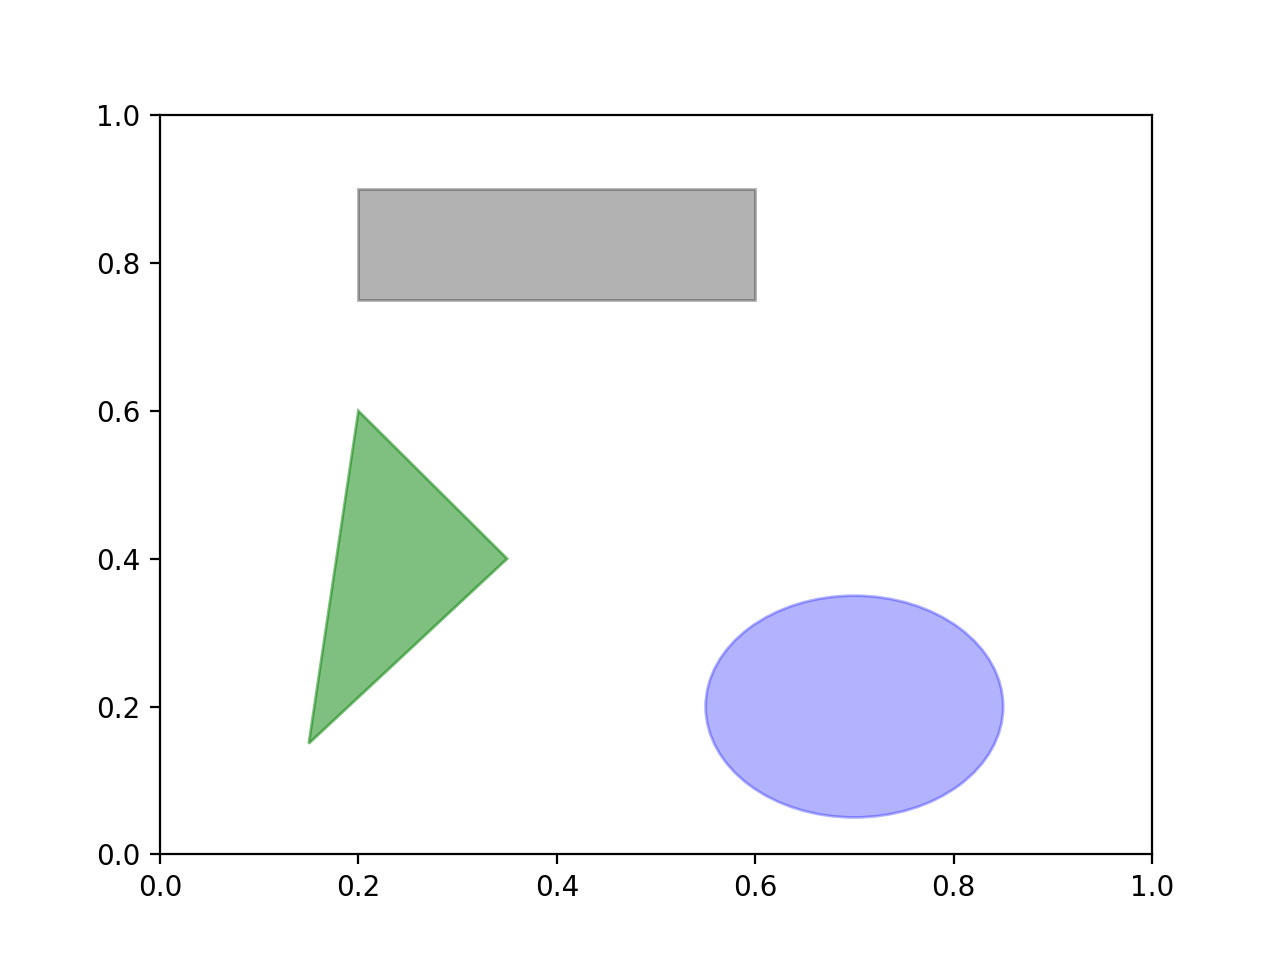

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots to File
use fucntion: 
 * **plt.savefig**
 
or use the figure object's **savefig** instance method:
 * **fig.savefig**
 
The file type is inferred from the file extension. So if you used *.pdf* instead, you would get a PDF. Important options:
 * dpi : controls the dots-per-inch resolution
 * bbox_inches : trim the whitespace around the actual figure
 
To get the plot as a PNG with minimal whitespace around the plot and at 400 DPI:

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

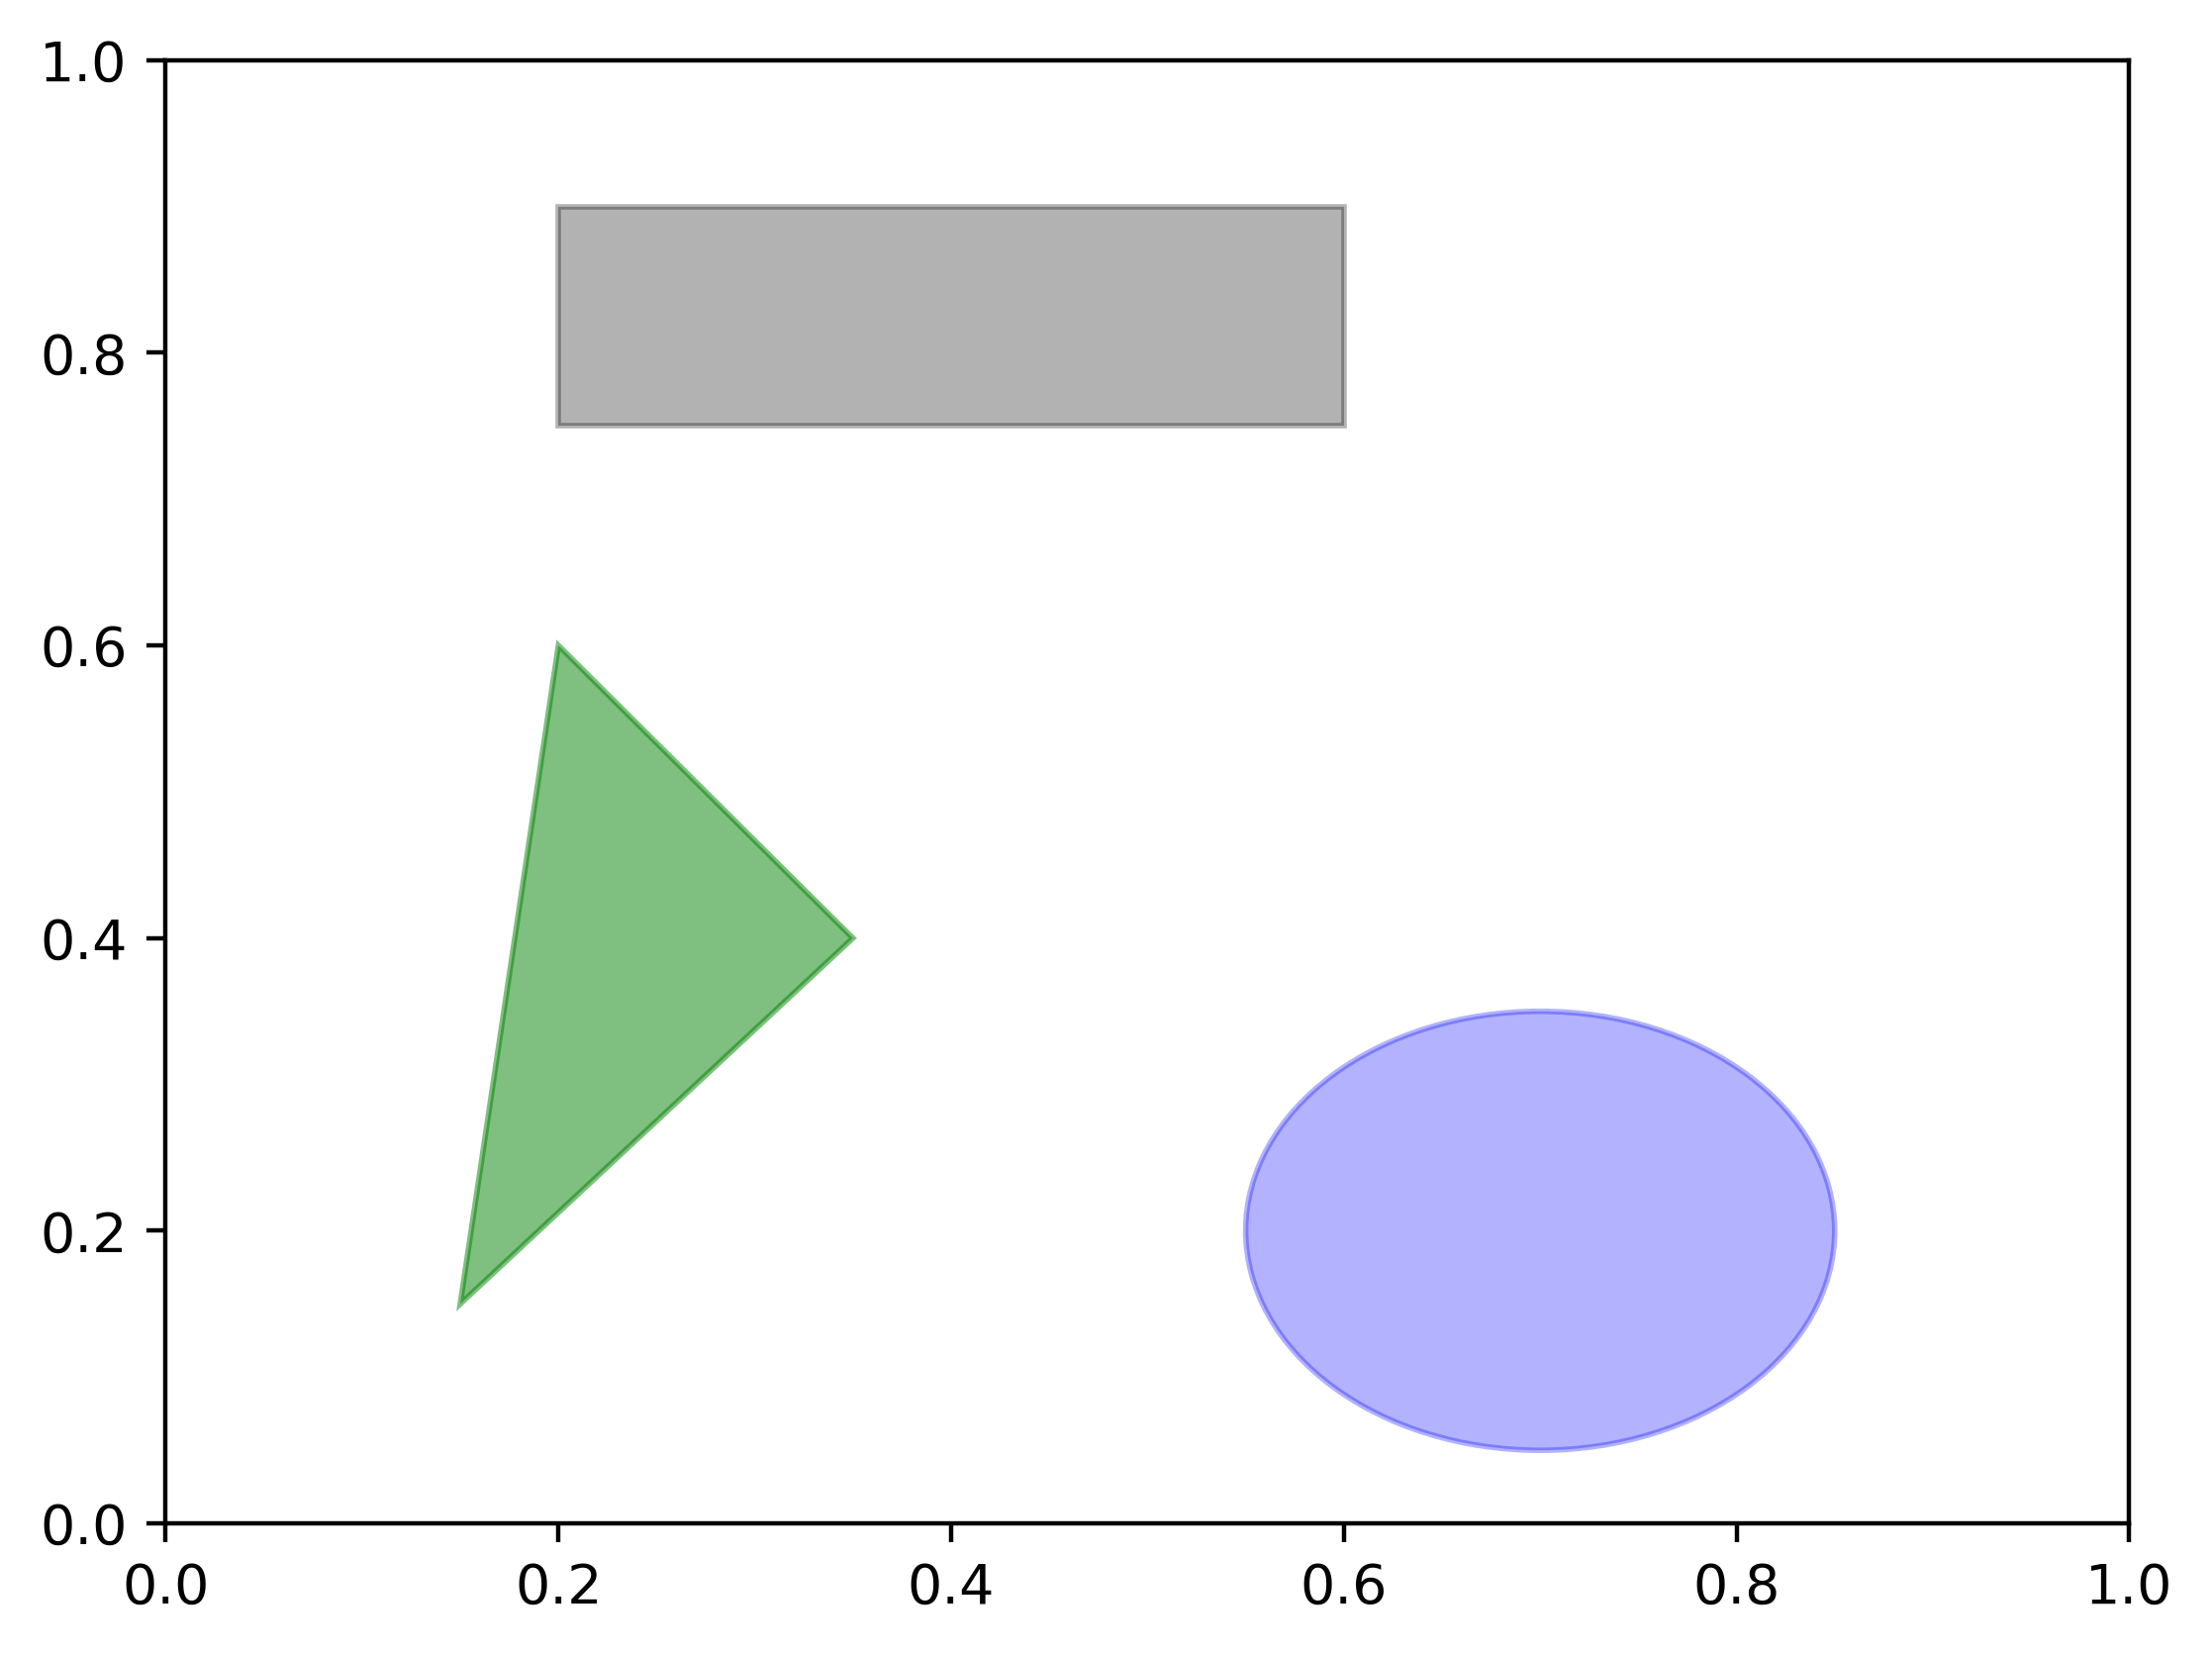

#### matplotlib Configuration
matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. To customize all the parameters programmatically from Python is to use the **rc** method:
 * to set the global default figure size to be 10x10:

In [90]:
plt.rc('figure', figsize=(6, 10))

The first argument to **rc** is the component you wish to customize, such as:
 * 'figure'
 * 'axes'
 * 'xtick'
 * 'ytick'
 * 'grid'
 * 'legend'
 * 'font'

After that can follow  a sequence of keyword arguments indicating the new parameters. Can write down the parameters as a dict:

In [73]:
font_options = {'family': 'monospace',
               'weight': 'bold',
               'size': 8}
plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file **matplotlib** in the **matplotlib/mpl-data** directory. If you customize this file and place it in your home directory titled **.matplotlibrc** , it will be loaded each time you use matplotlib.

The seabornp package several built-in plot themes or styles that usem atplotlib's configuration system internally.

## Backends    (可选读物)
### What is a backend?
matplotlib targets many different use cases and output formats. To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code， whereas the "backend" does all the hard work behind-the-scenes to make the figure. There are two types of backends:
 * interactive backends: (for use in pygtk, wxpython, tkinter, qt4, or macosx)
  * pyplot functions automatically draw to the screen
  * using object method calls in addition to pyplot functions, then call *draw()* whenever you want to refresh the plot.
 * non-interactive backends: hardcopy backends to make image files
  * use non-interactive ......

There are four ways to configure the backend. If they conflict each other, the method mentioned last in the following list will be used: (此处需要的时候再继续看)

## Plotting with pandas and seaborn

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is **seaborn**, a statistical graphics simplifies creating common visualization types.

**Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you donot use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.**

In [162]:
import seaborn as sns

### Line Plots
Series and DataFrame each have a plot attribute for making basic plot types. By default, plot() makes line plots:

<IPython.core.display.Javascript object>


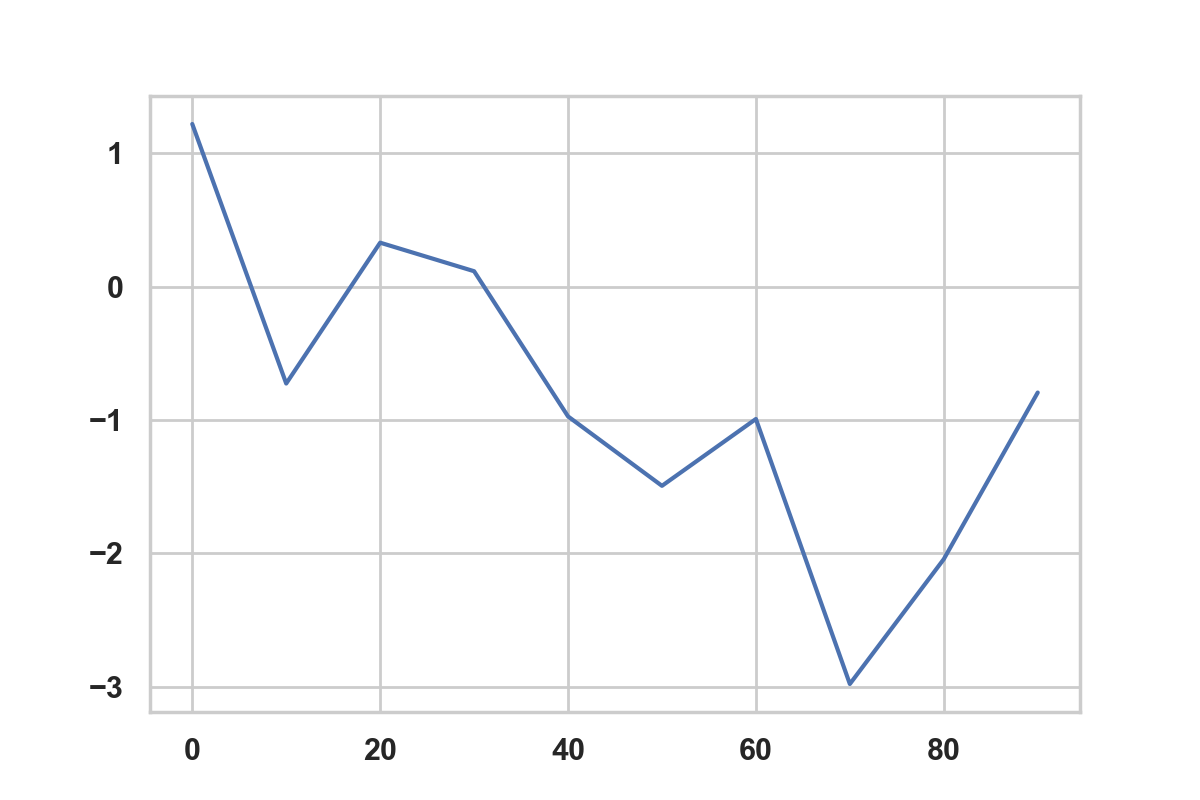

In [163]:
fig = plt.figure()
fs = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
fs.plot()

The Series object's index is passed to matplotlib for plotting on the x-axis, can be disabled by passing **use_index=False**.

Most of pandas's plotting methods accept an optional **ax** parameter, which can be a matplotlib subplot object.

DataFrame's **plot** method plots each of its **columns** as a different line on the same subplot, creating a legend automatically:

<IPython.core.display.Javascript object>


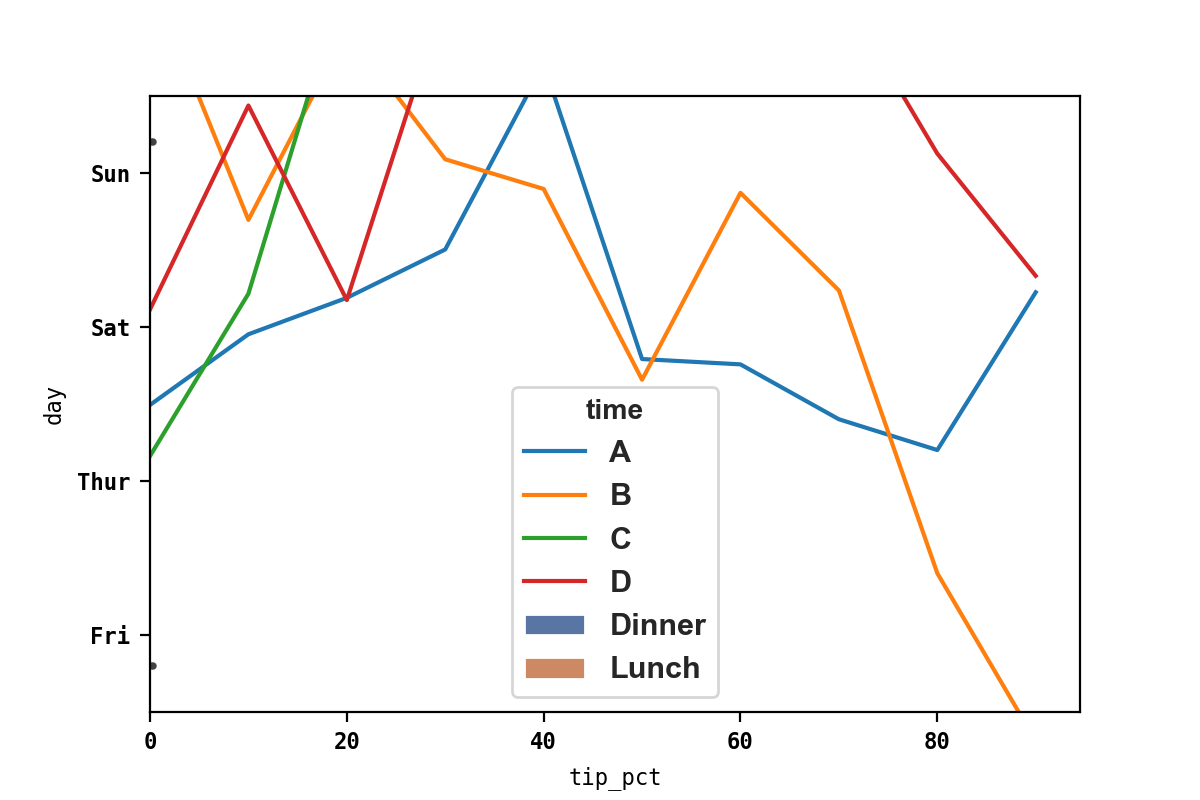

In [125]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

The above **plot** attribute contains a 'familly' of methods for different plot types. For example, **df.plot()** is equivalent to **df.plot.line()**

Series.plot method arguments
Argument | Description
-------- | ---------
label | Label for plot legend
ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
style | Style string, like 'ko--', to be passed to matplotlib
alpha | The plot fill opacity (from 0 to 1)
kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
logy | Use logarithmic scaling on the y-axis
use_index | Use the object index for tick labels
rot | Rotation of tick labels (0 through 360)
xticks | Values to use for x-axis ticks
yticks | Values to use for y-axis ticks
xlim | x-axis limits (e.g., [0, 10])
ylim |
grid | Display axis grid (on by default)

DataFrame-specific plot arguments
Argument | Description
-------- | -----------
subplots | Plot each DataFrame column in a separate subplot
sharex | If subplots=True, share the same x-axis, linking ticks and limits
sharey | 
figsize | Size of figure to create as tuple
title | Plot title as string
legend | Add a subplot legend(True by default)
sort_columns | Plot columns in alphabetical order; by default uses existing column order

#### Bar Plots
The **plot.bar()** and **plot.barh()** make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks:

<IPython.core.display.Javascript object>


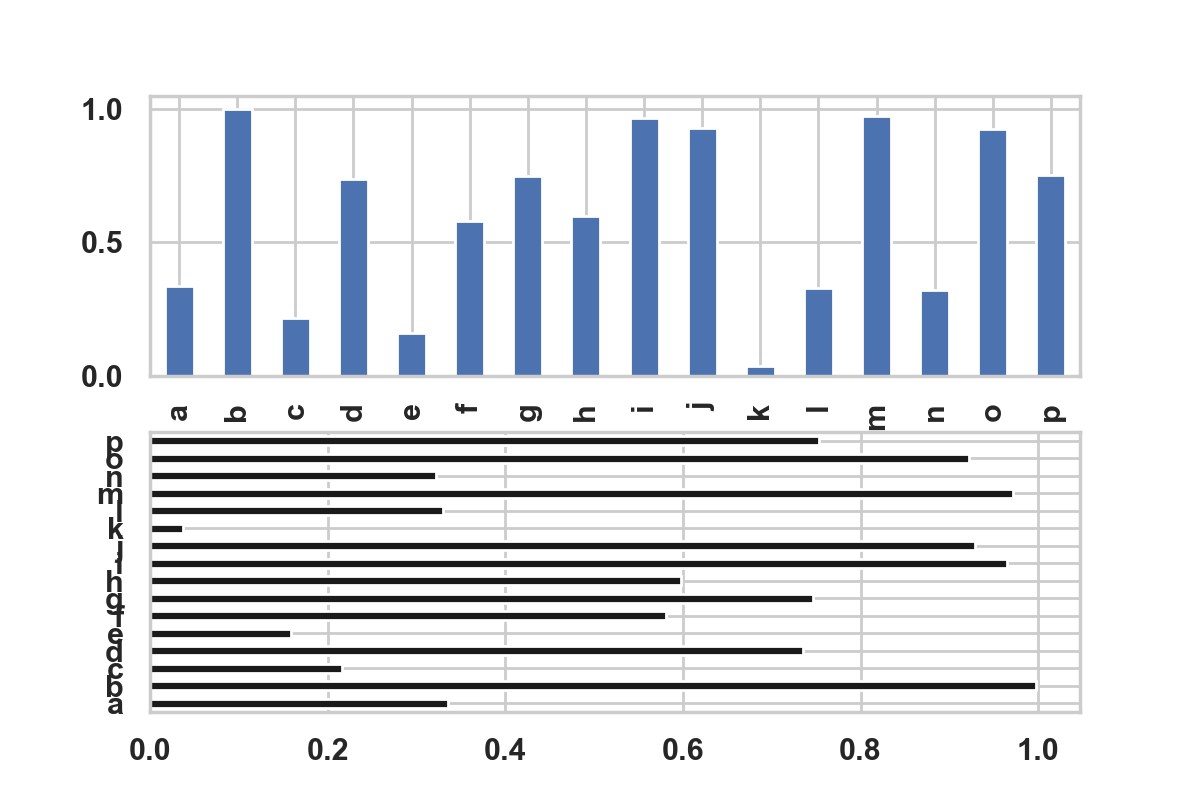

In [164]:
fig, axes = plt.subplots(2, 1)
plt.rc('figure', figsize=(5, 6))
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b')
data.plot.barh(ax=axes[1], color='k')

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [165]:
# 不需要给index命名的话，可省略pd.Index
df = pd.DataFrame(np.random.rand(6, 4), 
                 index=pd.Index(['one', 'two', 'three', 'four', 'five', 'six'], name='Test'),
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
Test,,,,
one,0.737679,0.778179,0.085007,0.246438
two,0.175544,0.856420,0.972894,0.283044
three,0.715059,0.795403,0.989282,0.599918
four,0.031105,0.064057,0.803341,0.125687
five,0.215729,0.830984,0.231162,0.446482
six,0.007486,0.035155,0.838408,0.721318


Note the row name is used to title the legend.

<IPython.core.display.Javascript object>


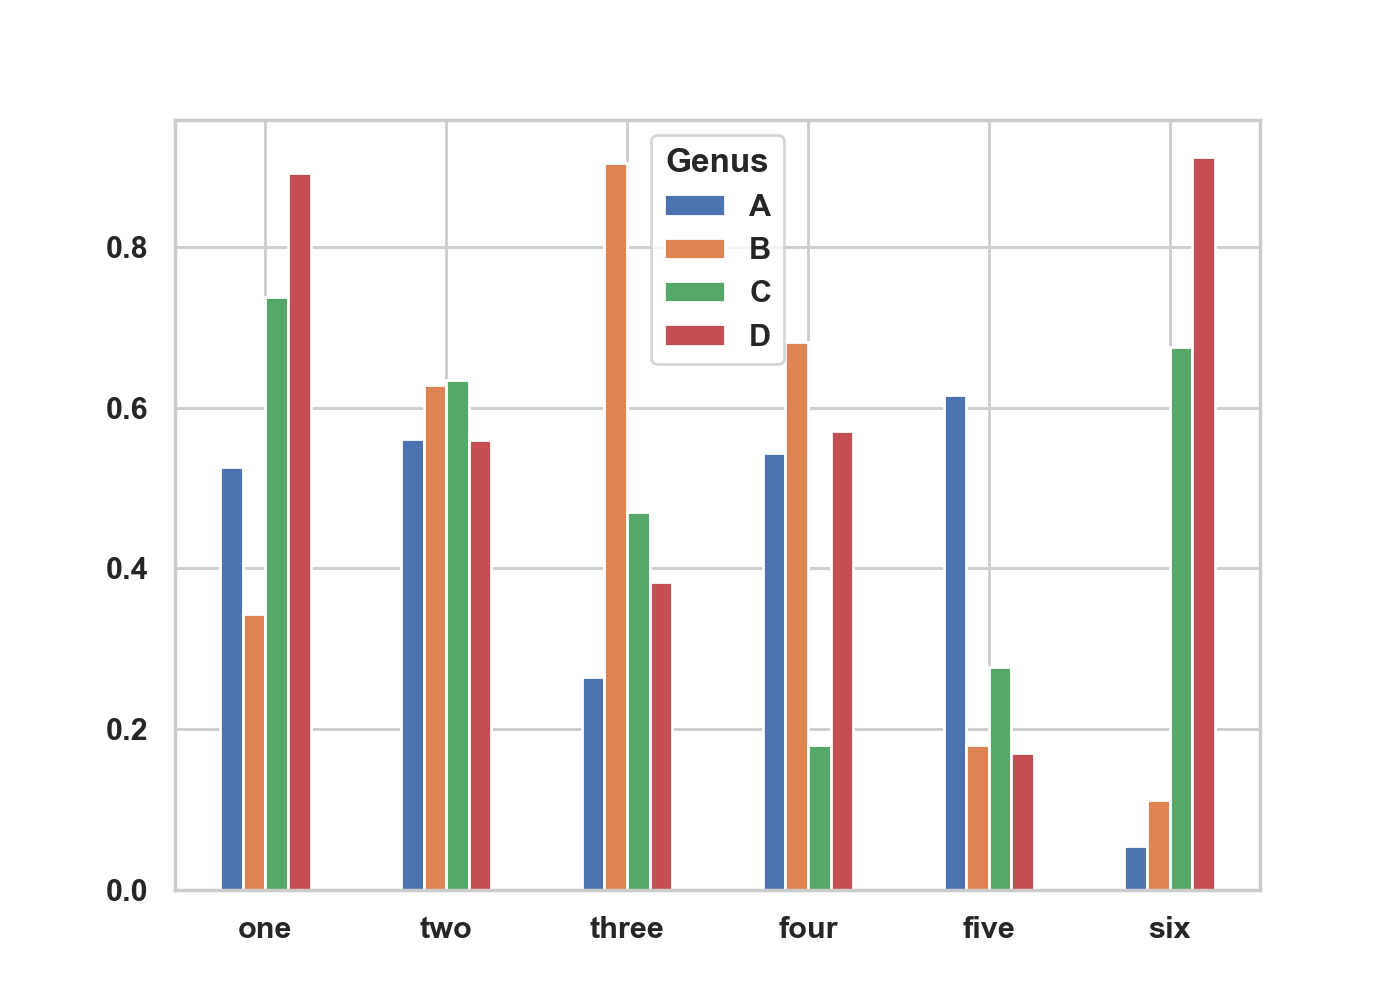

In [141]:
plt.rc('figure', figsize=(7, 5))
df.plot.bar(rot=0)

We create stacked bar plots from a DataFrame by passing **stacked=True**, resulting in the value in each row being stacked together:

<IPython.core.display.Javascript object>


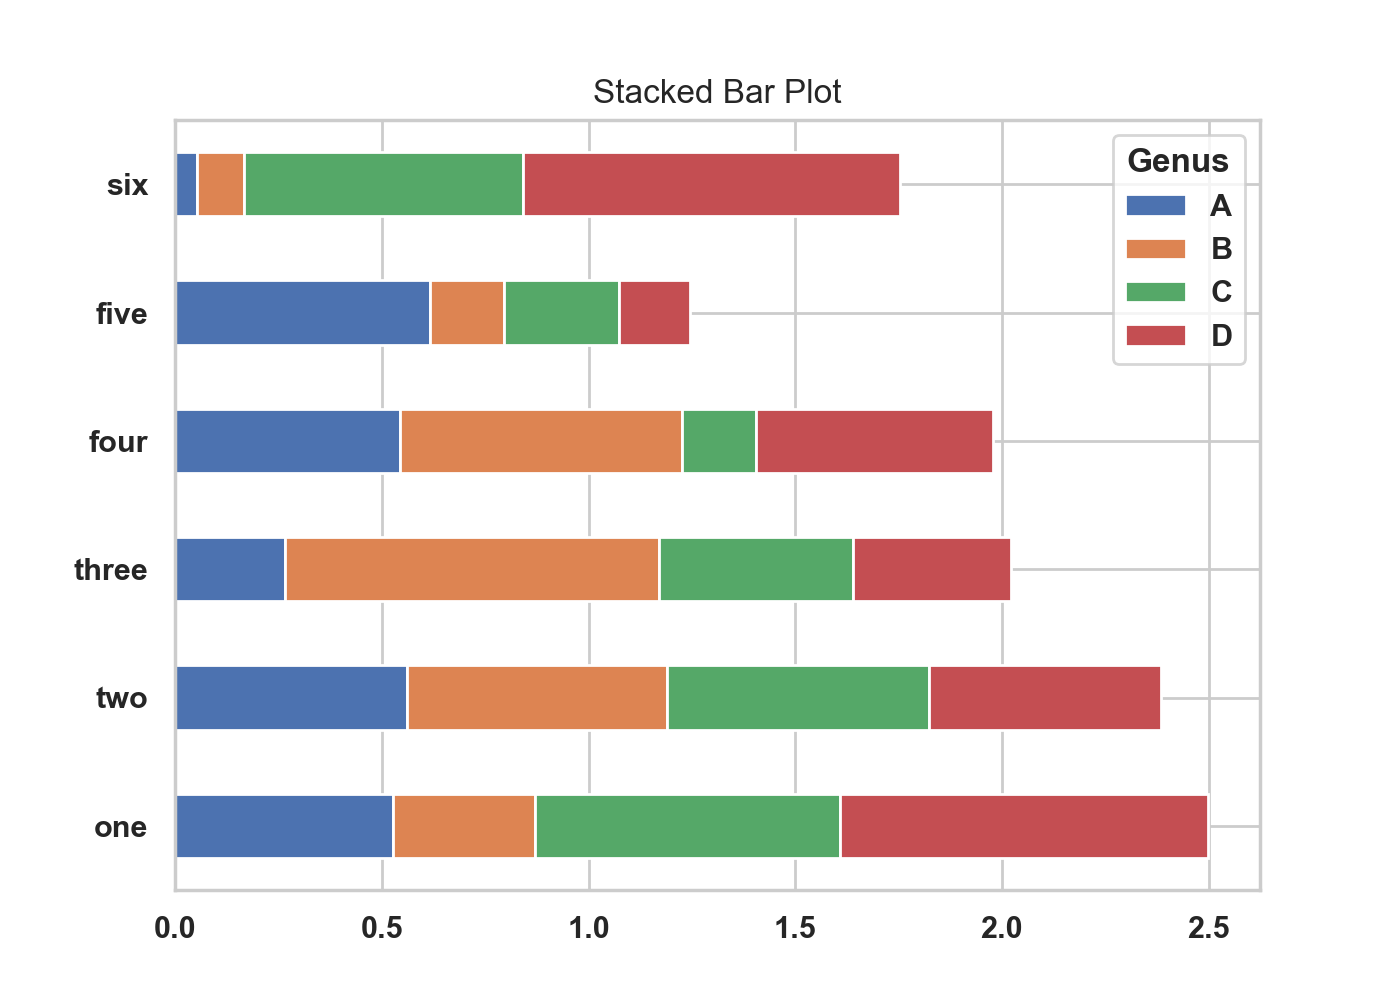

In [148]:
df.plot.barh(stacked=True, title='Stacked Bar Plot')

A useful recipe for bar plots is to visualize a Series's value frequency using vlaue_counts: s.value_counts().plot.bar()

### pandas 透视表和交叉表：
 * 透视表：pivot table
 * 交叉表：cross table, 取出两组（或多组）数据，分别作为横纵轴，表中数据为分属对应类别的数据数量。
 
下面从书中导入一组数据来举例练习：

In [151]:
tips = pd.read_csv('pydata-book/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


交叉表：

In [152]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


1人和6人的聚会比较少，把他们的数据忽略掉

In [153]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then normalize so each **row** sums to 1

In [154]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
# .sum(1): 横向作加法，沿纵向重复；
# axis=0: 纵向作除法，沿横向重复；
# .div: 除法
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [155]:
party_counts.sum(0)

size
2    156
3     38
4     37
5      5
dtype: int64

In [156]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

<IPython.core.display.Javascript object>


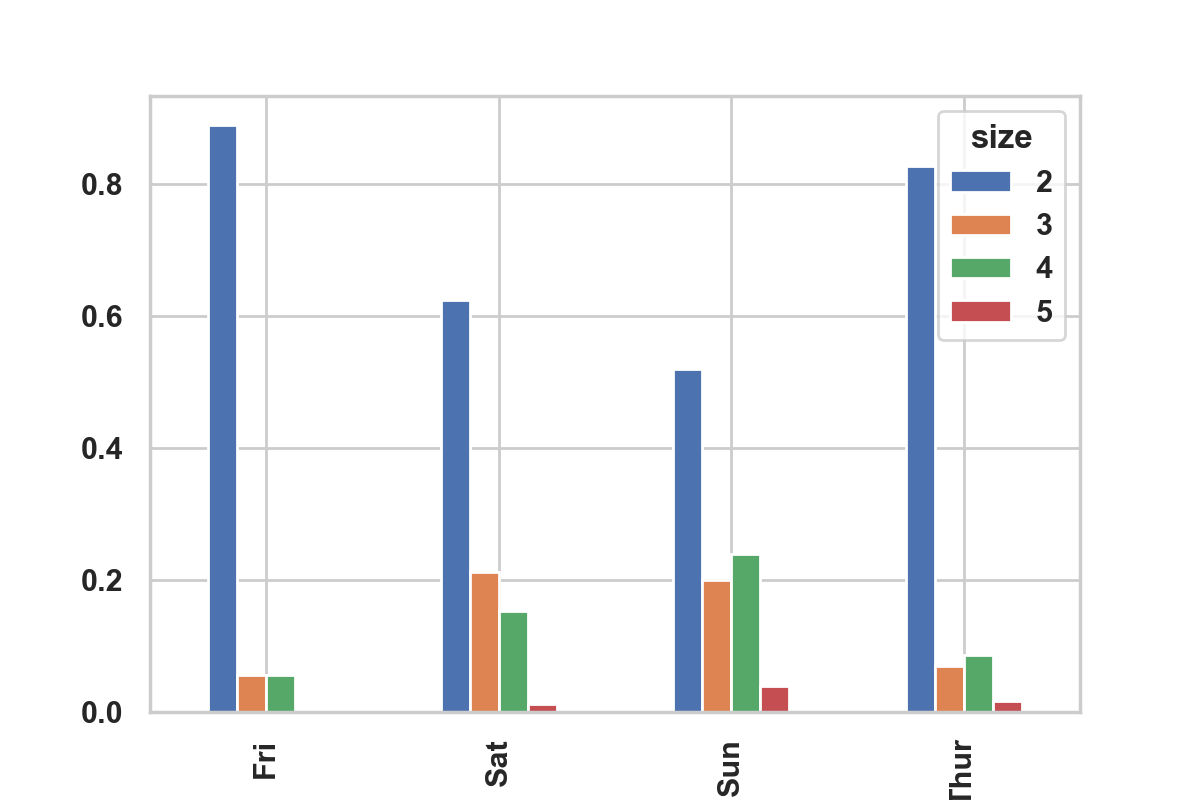

In [157]:
# fraction of party by size each day
plt.rc('figure', figsize=(6, 4))
party_pcts.plot.bar()

In [160]:
import seaborn as sns
# calculate percentage of tip over total bill
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


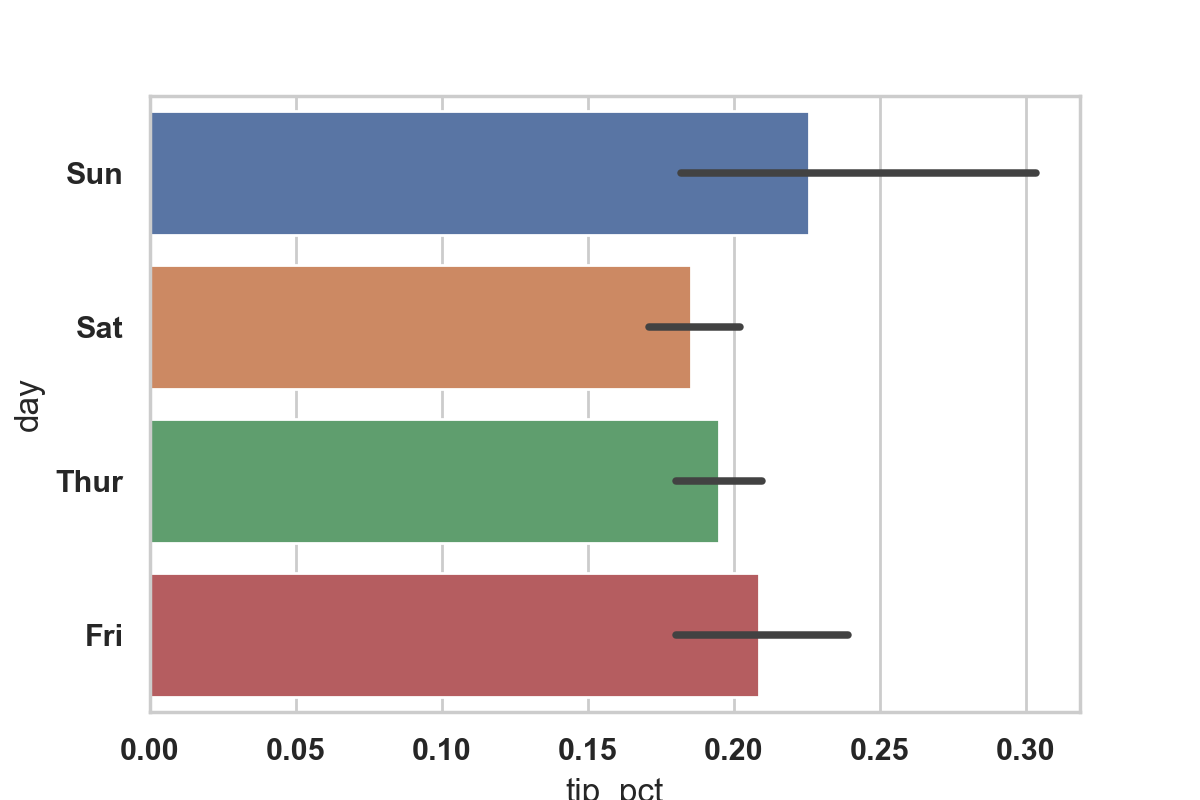

/Users/jianbinliu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [161]:
fig = plt.figure()
#sns的plot数据写入方式与之前的plot不同
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

split by an additional categorical value using hue

<IPython.core.display.Javascript object>


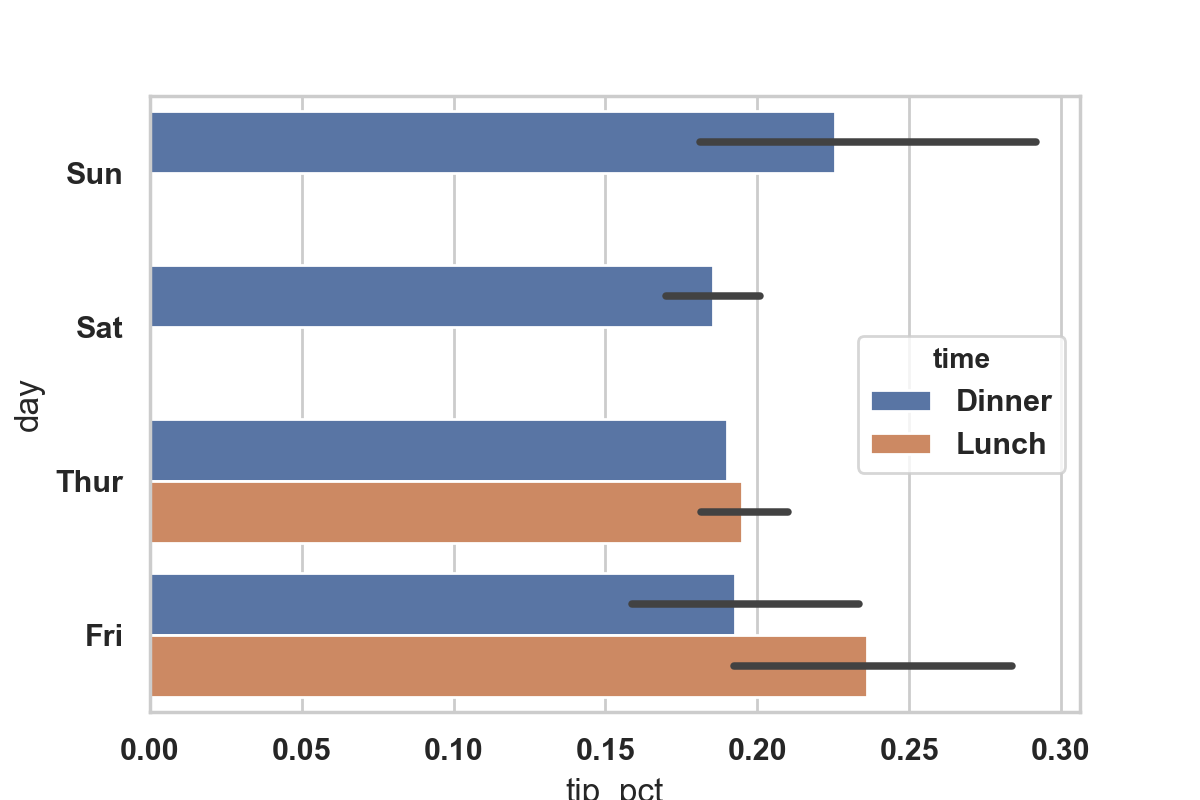

In [127]:
fig = plt.figure()
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', hue='time')